In [ ]:
# Import our standard libraries.
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns  # for nicer plots
sns.set(style='darkgrid')  # default style
import tensorflow as tf

## Logistic Regression

Suppose we have a dataset with 2 datapoints, $x^{(0)}$ and $x^{(1)}$, each with 3 features (and a dummy 1 for learning the bias). Now our target labels are binary (0 or 1).

In [ ]:
# Here are our inputs.
X = np.array([[1, 3, -2, 0],
              [1, 1, 0, 1]])
Y = np.array([0, 1])

print('X:', X, sep='\n')
print('Y:', Y, sep='\n')

X:
[[ 1  3 -2  0]
 [ 1  1  0  1]]
Y:
[0 1]


Let's write out our model function:

\begin{align}
h_W(x) = \phi(w_0x_0 + w_1x_1 + w_2x_2 + w_3x_3) = \phi(xW^T) = \frac{1}{1+e^{(-xW^T)}}
\end{align}

We can get all predictions with this matrix product:

\begin{align}
\hat{Y} = h_W(X) = \phi(XW^T) =
\phi\begin{pmatrix}
x_{0,0} & x_{0,1} & x_{0,2} & x_{0,3} \\
x_{1,0} & x_{1,1} & x_{1,2} & x_{1,3} \\
\vdots & \vdots & \vdots & \vdots \\
x_{m-1,0} & x_{m-1,1} & x_{m-1,2} & x_{m-1,3} \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
w_3 \\
\end{pmatrix}
\end{align}

First, let's write the sigmoid (logistic) function $\phi$.

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

Now, given some initial parameter values (below), compute the model's initial predictions.

In [ ]:
# Initial parameter values.
W = [1, 1, 1, 1]

# Compute predictions.
preds = sigmoid(np.dot(X, W))
print(preds)

[0.88079708 0.95257413]


In [ ]:
print("preds shape:", preds.shape)
print("preds ndim:",preds.ndim)

preds shape: (2,)
preds ndim: 1


We're not going to use MSE for logistic regression. Instead, we'll use the *logistic loss*, also called *binary cross-entropy* (more on that name later):

\begin{align}
LogLoss = \frac{1}{m} \sum_i -y_i\log(\hat{y_i}) - (1-y_i)\log(1-\hat{y_i})
\end{align}

Despite this new loss function, it turns out that the gradient computation is the same as it was for MSE with linear regression. A happy coincidence.

\begin{align}
\nabla J(W) &= \frac{1}{m}(h_W(X) - Y)X
\end{align}

Let's write the code for a single gradient descent step:

In [ ]:
# Run gradient descent
m, n = X.shape  # m = number of examples; n = number of features (including bias)
learning_rate = 0.1

preds = sigmoid(np.dot(X, W))
loss = (-Y * np.log(preds) - (1 - Y) * np.log(1 - preds)).mean()
gradient = np.dot((preds - Y), X) / m
W = W - learning_rate * gradient

print('predictions:', preds)
print('loss:', loss)
print('gradient:', gradient)
print('weights:', W)

predictions: [0.88079708 0.95257413]
loss: 1.0877576813083567
gradient: [ 0.4166856   1.29748268 -0.88079708 -0.02371294]
weights: [0.95833144 0.87025173 1.08807971 1.00237129]


## Now with TensorFlow/Keras

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(
    units=1,                     # output dim
    input_shape=[4],             # input dim
    use_bias=False,              # we included the bias in X
    activation='sigmoid',        # apply a sigmoid to the output
    kernel_initializer=tf.ones_initializer,  # initialize params to 1
))
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# As above, get predictions for the current model first.
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [ ]:
preds

array([[0.8807971 ],
       [0.95257413]], dtype=float32)

In [ ]:
# Do a single gradient update.
history = model.fit(
  x = X,
  y = Y,
  # epochs=1,
  epochs=10, #try then 10 epochs to get an idea of log loss below in plot
  batch_size=2,
  verbose=0)

# Show the loss (before the update) and the new weights.
loss = history.history['loss'][0]
weights = model.layers[0].get_weights()[0].T
print('predictions:', preds.T)
print('loss:', loss)
print('W:', weights)

predictions: [[0.8807971  0.95257413]]
loss: 1.0877577066421509
W: [[0.7895426  0.28848827 1.5010544  1.0400697 ]]


In [ ]:
# methods available for the history object
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api_export_path',
 '_api_export_symbol_id',
 '_model',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params']

In [ ]:
# history object stores info about the training process
# ex. loss at each epoch, ex. metrics like accuracy
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss'])

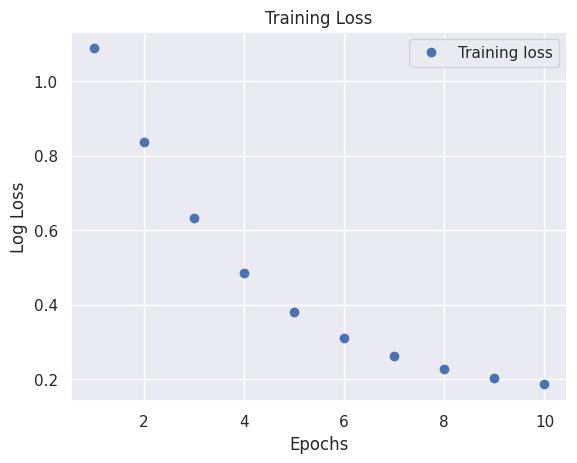

In [ ]:
# Plot Log Loss

loss = history_dict['loss']
epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend();

In [ ]:
# Plot Accuracy: Training

acc = history_dict['accuracy']
acc

[0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

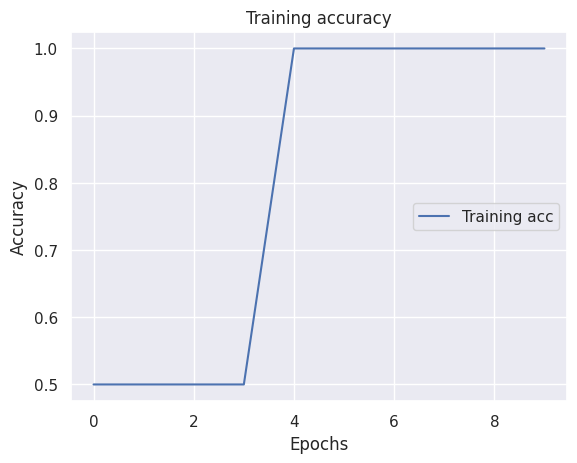

In [ ]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='center right');

In [ ]:
preds2 = model.predict(X)
preds2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.20634465],
       [0.89265007]], dtype=float32)

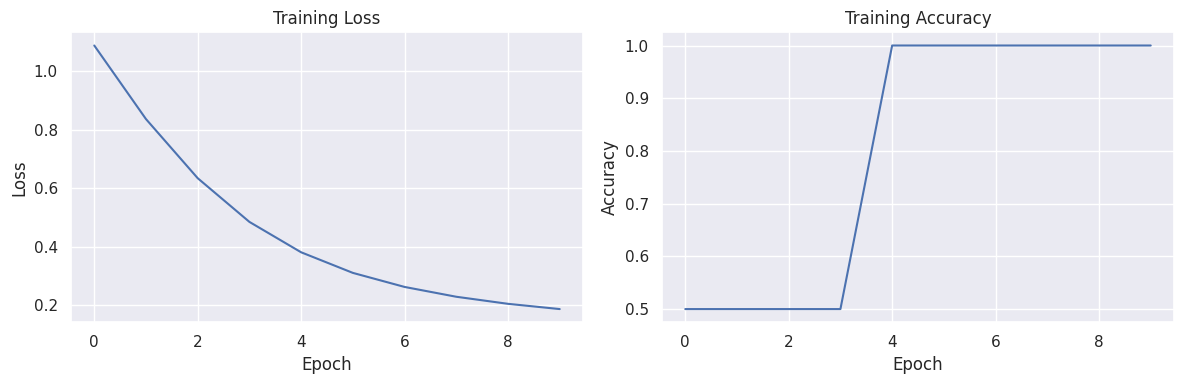

In [ ]:
# Plotting #2 View

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss
axes[0].plot(history.history['loss'])
axes[0].set_title('Training Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')


# Plot accuracy
axes[1].plot(history.history['accuracy'])
axes[1].set_title('Training Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')


plt.tight_layout()  # Adjusts subplot parameters for a tight layout.
plt.show()